#EDA on **Netflix**
![My Image](netfliximg.png)


# About Data
### This dataset contains data collected from Netflix of different TV shows and movies from the year 2008 to 2021.

- type: Gives information about 2 different unique values one is TV Show and another is Movie
- title: Gives information about the title of Movie or TV Show
- director: Gives information about the director who directed the Movie or TV Show
- cast: Gives information about the cast who plays role in Movie or TV Show
- release_year: Gives information about the year when Movie or TV Show was released
- rating: Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc)
- duration: Gives information about the duration of Movie or TV Show
- listed_in: Gives information about the genre of Movie or TV Show
- description: Gives information about the description of Movie or TV Show

# Data Collection and Importing:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette =['#E50914', '#221f1f', '#141414', '#B20710']

['#221f1f', '#b20710', '#e50914','#f5f5f1']

# Set the custom palette
sns.set_palette(custom_palette)

In [5]:
netflix_orignal =pd.read_csv('netflix.csv')

In [9]:
#creating a copy of original data
netflix = netflix_orignal.copy()

## Overview of dataset

In [11]:
#top 5 row of data
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
#last 5 rows of data
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [15]:
#shape of data
netflix.shape

(8807, 12)

In [17]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### 📌Insights
- **The dataset comprises 8,807 rows and 12 columns.**
- **The movie release years in the dataset range from a minimum of 1925 to a maximum of 2021, indicating that it covers movies from 1925 to 2021.**

# Data Preprocessing

1. Check for Errors and Null Values

2. Replace Null Values with appropriate values

3. Drop down features that are incomplete and are not too relevant for analysis

4. Create new features that can would help to improve prediction 

In [25]:
#checking row wise duplicate records
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [27]:
#check for null values
miss=netflix.isnull().sum()
miss_percent= round((netflix.isnull().sum()/len(netflix))*100,2)
miss_data=pd.concat([miss,miss_percent],axis=1,keys=['Total','%'])
print(miss_data)

              Total      %
show_id           0   0.00
type              0   0.00
title             0   0.00
director       2634  29.91
cast            825   9.37
country         831   9.44
date_added       10   0.11
release_year      0   0.00
rating            4   0.05
duration          3   0.03
listed_in         0   0.00
description       0   0.00


- **The `director` column contains approximately 30% null values.**
- **The `cast` column has 9.37% null values.**
- **The columns `country`, `date_added`, `rating`, and `duration` have minimal missing values.**
- **There are no duplicate rows in this dataset.**

- For missing values in country we will replace with the most common country(mode)
- For cast and director will just add "No Data"


In [29]:
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

In [31]:
netflix['cast'].replace(np.nan,'No Data',inplace=True)
netflix['director'].replace(np.nan,'No Data',inplace=True)

## Create New Feature:

- extracte the day and month from the 'date_added' column to make it easier to analyze trends over time.
- Create a new column for genre to extract insights.
- Convert the 'date_added' column to datetime format.
- Drop unnecessary columns


In [33]:
# Convert 'date_added' to date time format with 'coerce' to handle and replace invalid dates.
netflix['date_added'] = pd.to_datetime(netflix['date_added'],errors='coerce')

In [35]:
# Extracted month,month_name,day  information from the 'date_added' column
netflix['month_added'] = netflix['date_added'].dt.month
netflix['month_name_added'] = netflix['date_added'].dt.month_name()
netflix['day_added'] = netflix['date_added'].dt.day_name()

In [37]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,Saturday


In [39]:
netflix['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [41]:
#Create a new column for genre
genres = netflix['listed_in'].str.split(', ')

netflix['genre1'] = genres.str[0]
netflix['genre2'] = genres.str[1]  
netflix['genre3'] = genres.str[2]  

In [43]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,day_added,genre1,genre2,genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,Saturday,Documentaries,NaN,NaN


In [45]:
#unique values in duration column
netflix['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

## 📊🔍 EDA: Exploratory Data Analysis

- **What different types of shows or movies are uploaded on Netflix?**

In [47]:
#data after cleaning
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,day_added,genre1,genre2,genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,Saturday,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,Friday,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,Friday,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,Friday,Docuseries,Reality TV,NaN
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,Friday,International TV Shows,Romantic TV Shows,TV Comedies


##  Movies vs TV Shows.

In [49]:
netflix['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Text(0.5, 1.0, 'Movies vs TV Shows')

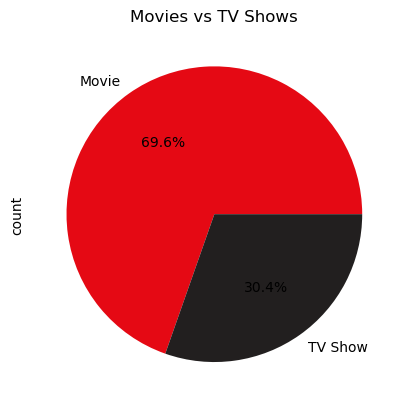

In [51]:
#create a pie chart
netflix['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Movies vs TV Shows')

## **✅Netflix content primarily consists of 69.6% movies and 30.4% TV shows.It is evident that there are more Movies on Netflix than TV shows.**

## What different types of shows or movies are uploaded on Netflix?

In [55]:
netflix.groupby(['type','genre1'])['genre1'].value_counts()

type     genre1                      
Movie    Action & Adventure               859
         Anime Features                    21
         Children & Family Movies         605
         Classic Movies                    80
         Comedies                        1210
         Cult Movies                       12
         Documentaries                    829
         Dramas                          1600
         Horror Movies                    275
         Independent Movies                20
         International Movies             128
         LGBTQ Movies                       1
         Movies                            57
         Music & Musicals                  18
         Romantic Movies                    3
         Sci-Fi & Fantasy                  13
         Sports Movies                      1
         Stand-Up Comedy                  334
         Thrillers                         65
TV Show  Anime Series                     176
         British TV Shows                 

## Top  Genres in TV Shows and Movies

In [59]:
#top shows and movies 
top_tv_genre = netflix[netflix['type']=='TV Show']['genre1'].value_counts().head(10)
top_movie_genre = netflix[netflix['type']=='Movie']['genre1'].value_counts().head(10)
top_tv_genre.values

array([774, 399, 388, 253, 221, 176, 120, 120,  67,  40])

Text(0.5, 1.0, 'Top  Movie')

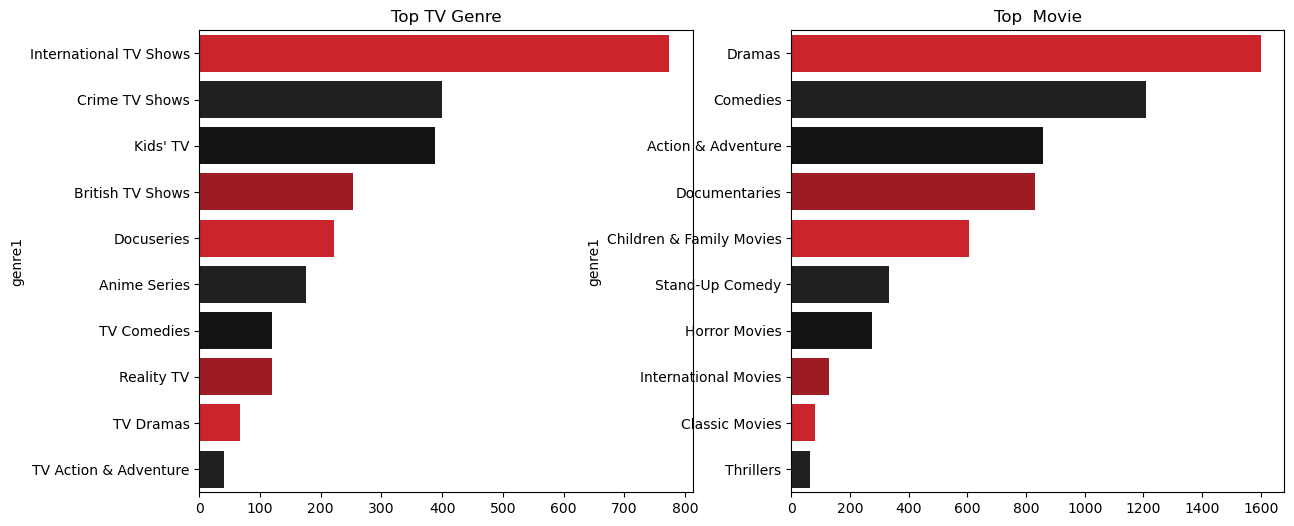

In [61]:
#bar graph
fig,axes = plt.subplots(1,2,figsize=(14,6))

sns.barplot(x=top_tv_genre.values, y=top_tv_genre.index,palette=custom_palette,ax=axes[0])
axes[0].set_title("Top TV Genre")

sns.barplot(x=top_movie_genre.values, y=top_movie_genre.index,palette=custom_palette,ax=axes[1])
axes[1].set_title("Top  Movie")

## ✅ `International TV Shows` dominate the genre preferences among the top TV shows on Netflix, while `Drama` stands out as the primary choice for movies

## Most content creating countries

In [63]:
top_country = netflix['country'].value_counts().head(10)

<Axes: xlabel='count', ylabel='country'>

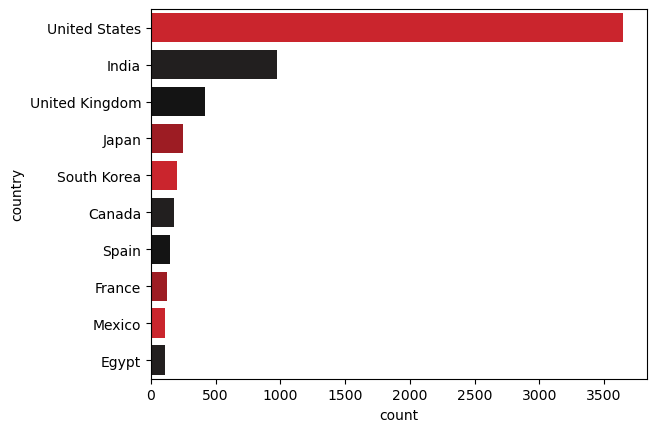

In [65]:
sns.countplot(y="country", data=netflix, order=top_country.index,palette=custom_palette)

## ✅The United States, India, and the United Kingdom are the top three countries contributing the most content to Netflix 🥇🇺🇸🥈🇮🇳🥉UK

## What's the best month to release content

In [67]:
month_counts = netflix['month_name_added'].value_counts()
month_counts

month_name_added
July         819
December     797
September    765
April        759
October      755
August       749
March        734
January      727
June         724
November     697
May          626
February     557
Name: count, dtype: int64

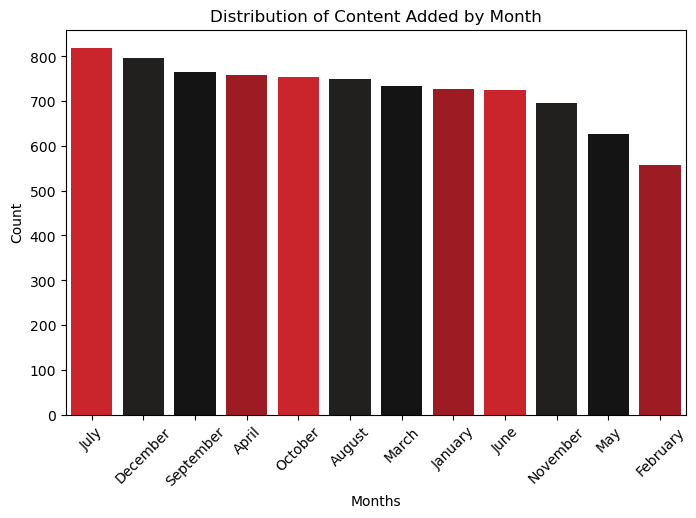

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=month_counts.index, y=month_counts, palette=custom_palette)

# Adding labels and title
plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Distribution of Content Added by Month")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

### ✅The months of July, December, and September stand out as the top three periods for content releases on Netflix.

In [71]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  month_added       8709 non-null   float64       
 13  month_name_added  8709 non-null   object        
 14  day_added         8709 n

## Year Wise Analysis

In [74]:
year = netflix['release_year'].value_counts().index[0:15]
year

Index([2018, 2017, 2019, 2020, 2016, 2021, 2015, 2014, 2013, 2012, 2010, 2011,
       2009, 2008, 2006],
      dtype='int64', name='release_year')

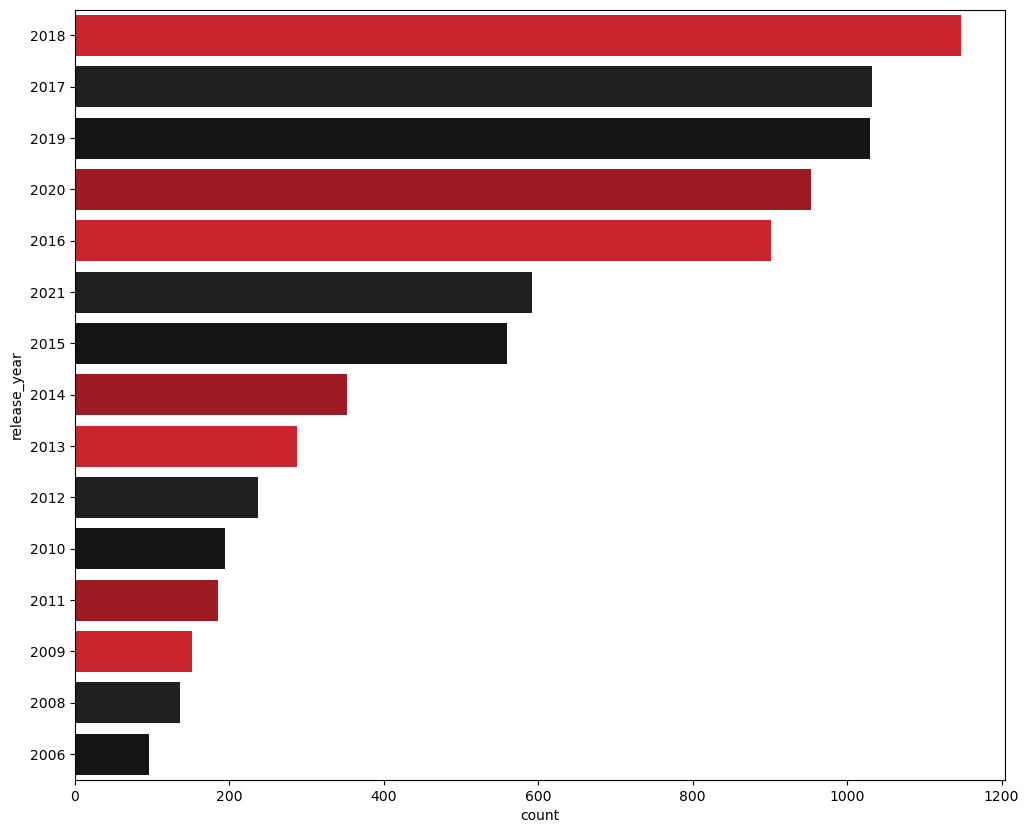

In [76]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data=netflix, palette=custom_palette, order=year)

##  ✅2018 was the year when most of the movies were released.

## Viewer Ratings Analysis

In [78]:
rating = netflix['rating'].value_counts().index[0:15]
rating

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min'],
      dtype='object', name='rating')

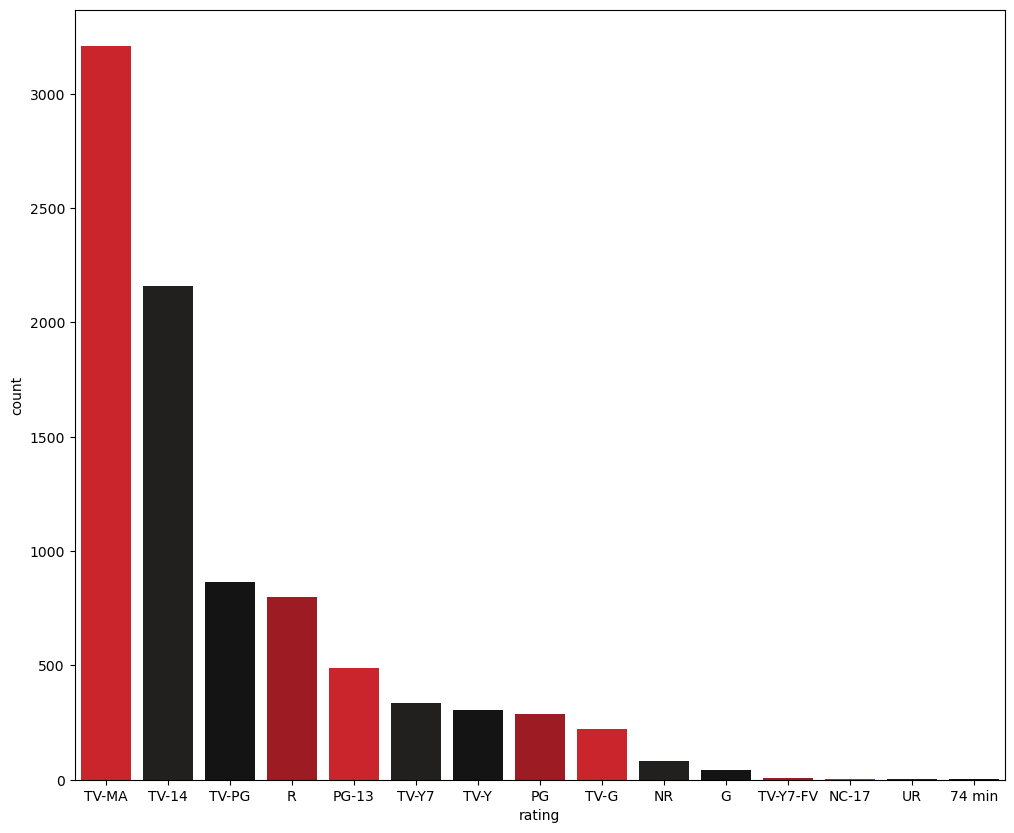

In [80]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=netflix, palette=custom_palette, order=rating)

##  ✅TV-MA' is the most common viewer rating on Netflix, indicating a strong presence of content suitable for mature audiences, followed by 'TV-14' and 'TV-PG,' with 'R' also available.

# 📌Insight and Conclusion 
- **Diverse Content Mix**: Netflix offers a diverse range of content, with 69.6% movies and 30.4% TV shows.

- **Genre Insights**: International TV Shows are a hit among the top TV shows, while Drama rules the movie category.

- **Top Content Providers**: The United States, India, and the United Kingdom are the primary content producers on Netflix.

- **Best Release Months**: For optimal content releases, focus on July, December, and September – they attract the most viewers.

- **Year-wise Peak**: 2018 marked a peak in Netflix movie releases. It's an ideal reference for planning content.

- **Viewer Ratings**: Netflix's most common rating is 'TV-MA,' indicating a significant collection for mature audiences. There's also content for 'TV-14,' 'TV-PG,' and 'R' fans.

- **Recommendation**: To maximize engagement, prioritize International TV Shows, Drama movies, and mature content. Strategically release in July, December, or September, and monitor audience trends for consistent success.